# Assignment 1 : which country has the most video uploads per capita 


In [231]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import ScalarFormatter

In [232]:
#Read the cleaned CSV file into dataframe 
youtube_df = pd.read_csv("Global_YouTube_Statistics.csv")
pd.options.display.float_format = "{:,.3f}".format

youtube_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,country_rank,lowest_yearly_earnings,highest_yearly_earnings,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,1,6800000,108400000,2006,Mar,28.100,1366417754,5.360,20.594,78.963
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,7670,0,0,2006,Mar,88.200,328239523,14.700,37.090,-95.713
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,1,4000000,64700000,2012,Feb,88.200,328239523,14.700,37.090,-95.713
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,2,5900000,94800000,2006,Sep,88.200,328239523,14.700,37.090,-95.713
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,2,5500000,87500000,2006,Sep,28.100,1366417754,5.360,20.594,78.963


In [233]:
#number of countries
countries_total = len(youtube_df.groupby("Country").count())
print(f" The total number of countries in this dataset is : {countries_total}")

 The total number of countries in this dataset is : 48


In [234]:
#reduce the columns leaving the ones needed for my analysis 

reduced_youtube_df = youtube_df[["Youtuber", "subscribers", "video views", "uploads", "Country", "Population"]]
reduced_youtube_df.head()

,Youtuber,subscribers,video views,uploads,Country,Population
0,T-Series,245000000,228000000000,20082,India,1366417754
1,YouTube Movies,170000000,0,1,United States,328239523
2,MrBeast,166000000,28368841870,741,United States,328239523
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,United States,328239523
4,SET India,159000000,148000000000,116536,India,1366417754


In [240]:
#summary 

uploads_mean = reduced_youtube_df.groupby(["Country"]).mean(numeric_only=True)["uploads"]
uploads_median = reduced_youtube_df.groupby(["Country"]).median(numeric_only=True)["uploads"]
uploads_var = reduced_youtube_df.groupby(["Country"]).var(numeric_only=True)["uploads"]
uploads_std = reduced_youtube_df.groupby(["Country"]).std(numeric_only=True)["uploads"]
uploads = reduced_youtube_df.groupby(["Country"]).sem(numeric_only=True)["uploads"]

summary_df = pd.DataFrame({
     "Mean": uploads_mean,
    "Median": uploads_median,
    "Variance": uploads_var,
    "Standard Dev": uploads_std,
    "Standard Error": uploads_sem
})

summary_df.dropna(inplace=True)

print(summary_df)

                            Mean      Median           Variance  Standard Dev  \
Country                                                                         
Argentina              1,326.154   1,007.000      1,807,018.974     1,344.254   
Australia                897.375     497.000      1,575,822.839     1,255.318   
Brazil                 2,757.016   1,307.000     24,625,485.283     4,962.407   
Canada                 3,116.333     887.000     39,580,802.238     6,291.328   
Chile                  2,257.000   2,052.000      5,518,825.000     2,349.218   
Colombia                 979.909     252.000      4,539,650.091     2,130.645   
Ecuador                  967.000     967.000        455,058.000       674.580   
Egypt                  2,968.000   2,968.000      9,812,450.000     3,132.483   
France                   445.400     222.000        385,234.300       620.672   
Germany                1,348.600   1,411.000      1,553,685.300     1,246.469   
India                 23,143

In [230]:
#extracting data grouping country and uploads

grouped_df = reduced_youtube_df.groupby('Country').sum(numeric_only=True)
grouped_df

,subscribers,video views,uploads,Population
Country,,,,
Afghanistan,20400000,13397000296,0,38041754
Argentina,328500000,194415353954,17240,584203256
Australia,154400000,65389465134,7179,206132840
Bangladesh,13900000,12129583055,6,167310838
Barbados,41900000,22477745835,84,287025
Brazil,1207300000,478768256178,168178,12966124437
Canada,363900000,191320574087,46745,554879715
Chile,87200000,29347556577,6771,56856114
China,17600000,2977741577,128,1397715000


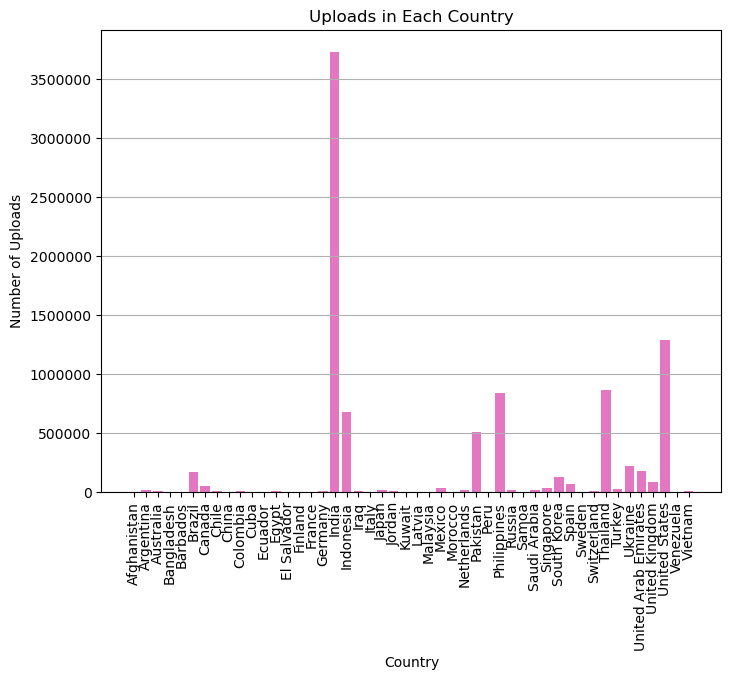

In [156]:
#amount of uploads in each country
# Create a bar plot

plt.figure(figsize=(8, 6))
plt.bar(grouped_df['Country'], grouped_df['uploads'], color='tab:pink')
plt.xlabel('Country')
plt.ylabel('Number of Uploads')
plt.title('Uploads in Each Country')

plt.xticks(rotation=90)
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, axis='y') 


plt.show()

In [162]:
#Top Uploads Per Capita, Scaled to 1000 People

grouped_df["uploads_per_capita"] = grouped_df["uploads"] / grouped_df["Population"] *1000

top_uploads_per_capita = grouped_df.sort_values(["uploads_per_capita"],ascending =False)


top_uploads_per_capita

,Country,subscribers,video views,uploads,Population,uploads_per_capita
35,Singapore,16200000,20522339099,31889,5703569,5.591
43,United Arab Emirates,102300000,51088634342,172827,48852645,3.538
39,Switzerland,19400000,5529131886,10728,8574832,1.251
24,Latvia,20200000,20919403720,1935,1912789,1.012
31,Philippines,209900000,126912709897,838090,1081166150,0.775
40,Thailand,386500000,264317974741,858953,1253260476,0.685
42,Ukraine,125600000,58465331234,220128,355081240,0.620
29,Pakistan,129900000,108651656560,507702,866261272,0.586
4,Barbados,41900000,22477745835,84,287025,0.293
28,Netherlands,58100000,23866285774,14329,51998550,0.276


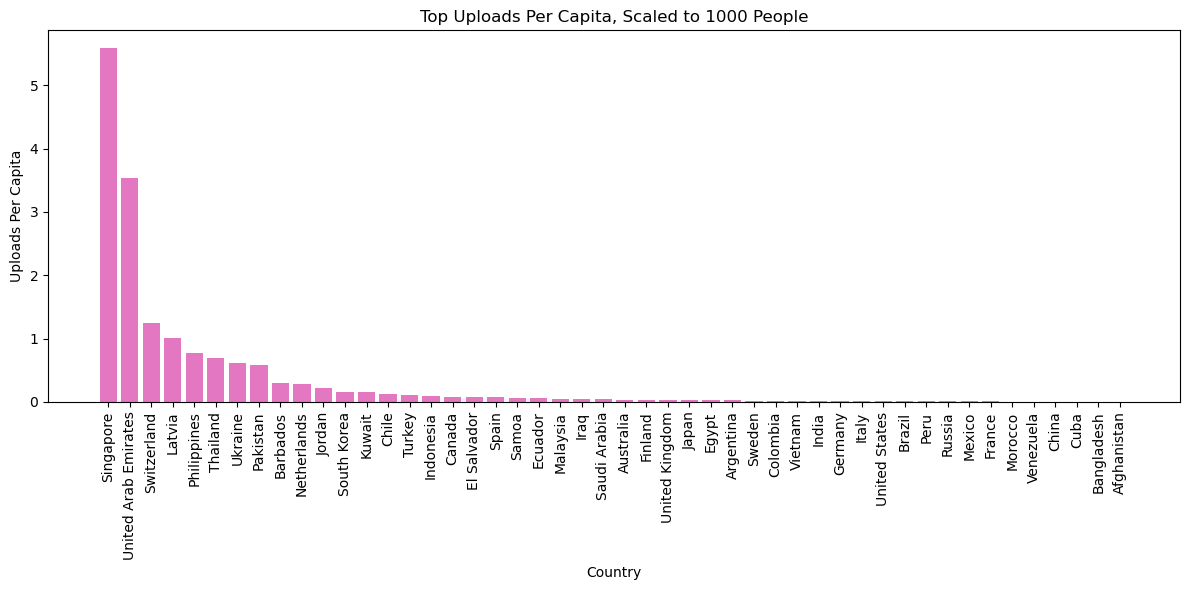

In [163]:
# Create a bar plot

plt.figure(figsize=(12, 6))
plt.bar(top_uploads_per_capita["Country"], top_uploads_per_capita["uploads_per_capita"], color="tab:pink")

# Customize the plot
plt.xlabel("Country")
plt.ylabel("Uploads Per Capita")
plt.title("Top Uploads Per Capita, Scaled to 1000 People")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()